<center>Universidade Federal de Viçosa</center>
<center>Coordenadoria de Educação Aberta e a Distância</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2022/2</center>

**<center>AULA PRÁTICA 4: Técnicas de Limiarização, Segmentação e Descritores de Objeto</center>**

#**Técnicas de Limiarização**

[**Image Thresholding**](https://https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)





In [ ]:
#Permissão para acessar o drive
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#Importando bibliotecas
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
# Criar uma imagem 256x256 onde cada linha tem um valor de pixel variando de 1 a 256
I=np.zeros((256,256),dtype='uint8')

for i in range(0,255):
    I[i,:]=i



###**1.   Limiarização global**

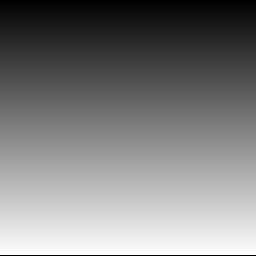

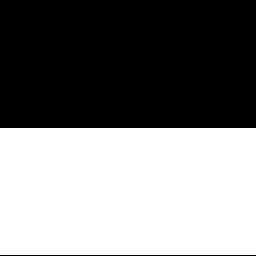

In [ ]:
#Limiarização global
#Função para aplicar um limiar fixo a uma imagem de uma única banda
#src=imagem
#thresh= limiar definido pelo operador
#maxval= valor atribuido ao pixel acima do limiar (ou abaixo), depende do type, 255=branco
#type (é um flag)= tipo da limiarização
#T=ret= valor do limiar como resultado também
#dst/i1,i2..= destination, imagem limiarizada
ret,I1 = cv2.threshold(I,127,255,cv2.THRESH_BINARY)
ret,I2 = cv2.threshold(I,127,255,cv2.THRESH_BINARY_INV)
ret,I3 = cv2.threshold(I,127,255,cv2.THRESH_TRUNC)
ret,I4 = cv2.threshold(I,127,255,cv2.THRESH_TOZERO)
ret,I5 = cv2.threshold(I,127,255,cv2.THRESH_TOZERO_INV)

cv2_imshow(I) #original
cv2_imshow(I1) #acima do limear é branco (255), abaixo é preto (zero)
#cv2_imshow(I2) #abaixo do limear é branco, acima é preto
#cv2_imshow(I3) #abaixo do limear ele repete o valor (cinza) e acima ele não altera a imagem orignial
#cv2_imshow(I4) #abaixo do limear ele zera e acima mantem os valores originais
#cv2_imshow(I5) #acima do limear ele zera e abaixo mantem os valores originais



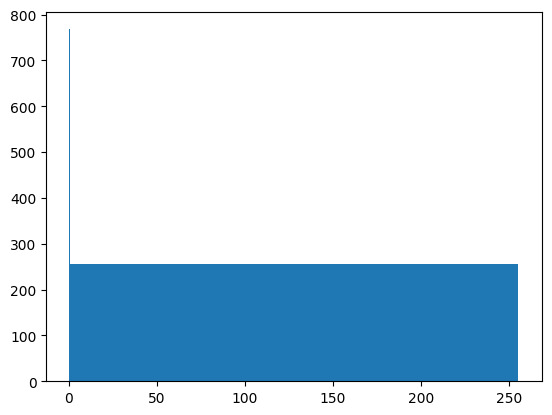

Entre com o limiar 50


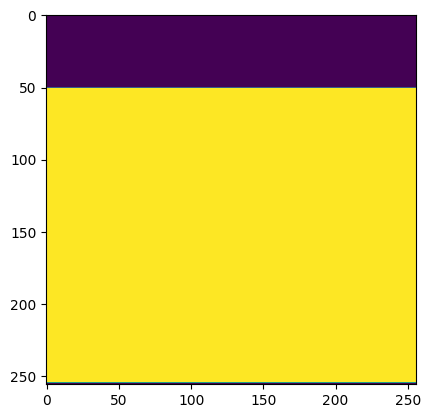

In [ ]:
#visualizar o histograma
plt.hist(I.ravel(), 255,[0,256])
plt.show()

#recebe um numero inteiro que voce diz pra ele na tela
L = int(input('Entre com o limiar '))

# Acrescente o comando limiarização com L
ret, I6 = cv2.threshold(I,L,255,cv2.THRESH_BINARY)
plt.imshow(I6)

**Desenhar uma imagem B (256x256, 8 bits) que possui dois quadrados:**
- Q1: centrado em (99,79), lado 131 e valor do pixel 200;
- Q2: centrado em (190,175), lado 81 e valor do pixel 200;
- Fundo: valor do pixel 100.

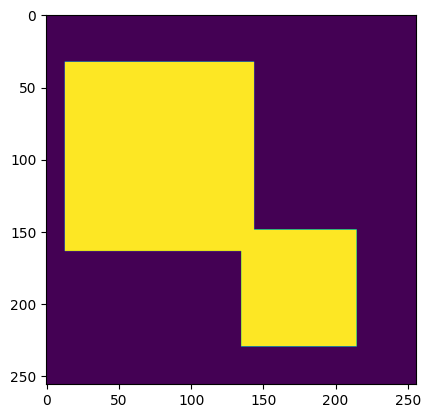

In [ ]:
B = np.zeros((256,256), dtype='uint8')+100 #Fundo
#lembrar que começa em 0 e o intervalo é aberto
B[33:164,13:144]=200
B[149:230,135:215]=200

plt.imshow(B) 

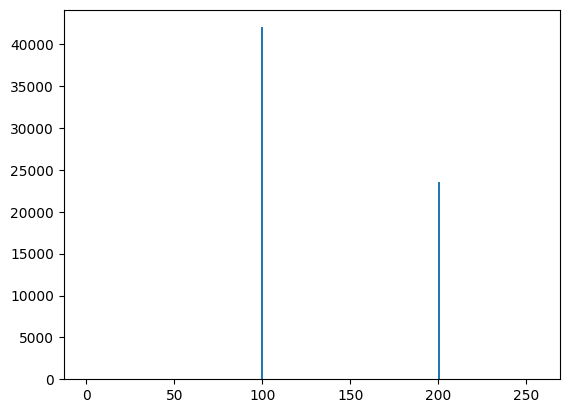

Entre com o limiar 150


<ipython-input-8-4655dc6fb98f>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot (2,2,i+1), plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))


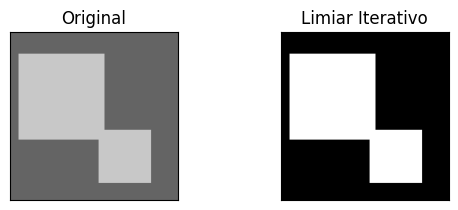

In [ ]:
#Método Iterativo
#visualizar o histograma
plt.hist(B.ravel(), 255,[0,256])
plt.show()

#recebe um numero inteiro que vc diz pra ele na tela
L = int(input('Entre com o limiar '))

# Acrescente o comando limiarização com L
ret, B2 = cv2.threshold(B,L,255,cv2.THRESH_BINARY)

plt.imshow(B2)

titulos = ['Original', 'Limiar Iterativo']
imagens = [B, B2]
for i in list(range(2)):
 plt.subplot (2,2,i+1), plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
 plt.title(titulos[i])
 plt.xticks([]), plt.yticks([])
plt.show()

###**2.   Adaptive Thresholding**

Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

The adaptiveMethod decides how the threshold value is calculated:
cv.ADAPTIVE_THRESH_MEAN_C
cv.ADAPTIVE_THRESH_GAUSSIAN_C

The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

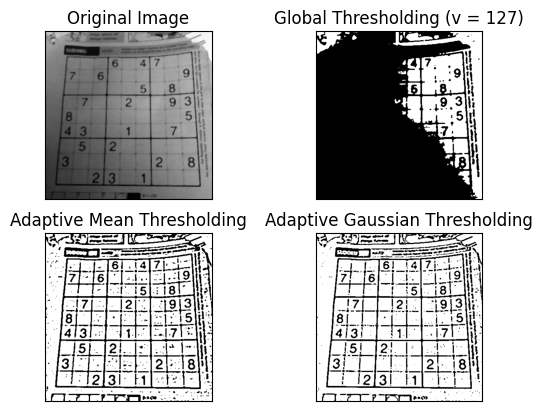

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_3/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

###**3.   Binarização de Otsu**

Limiar ótimo pelo Otsu =  100.0


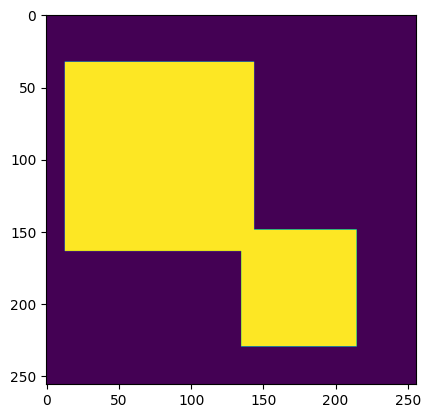

In [ ]:
ret1, B3 = cv2.threshold(B,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #default é o binario, ent nao precisa acrescentar
print ('Limiar ótimo pelo Otsu = ', ret1)
plt.imshow(B3)

In [5]:
#Importando bibliotecas
import cv2
import numpy as np
from skimage.io import imread, imshow
from scipy import stats
from matplotlib import pyplot as plt


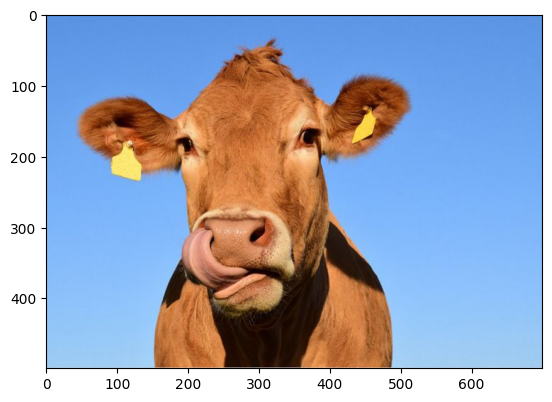

In [6]:
#Lendo imagem
im = imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_3/cow.jpg')
plt.imshow(im)

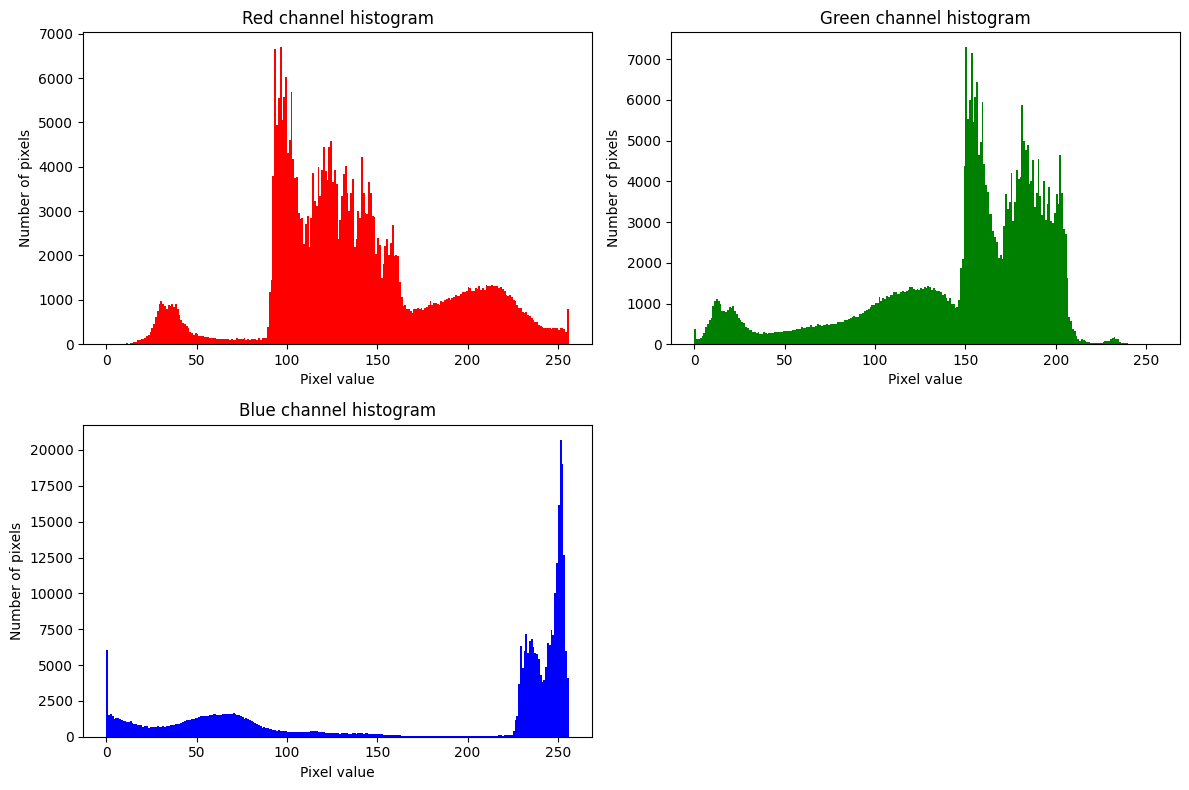

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
im_hist_red = plt.hist(im[:,:,0].flatten(), bins=256, range=[0, 256], facecolor='red')
plt.title('Red channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.subplot(2, 2, 2)
im_hist_green = plt.hist(im[:,:,1].flatten(), bins=256, range=[0, 256], facecolor='green')
plt.title('Green channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.subplot(2, 2, 3)
im_hist_blue = plt.hist(im[:,:,2].flatten(), bins=256, range=[0, 256], facecolor='blue')
plt.title('Blue channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.tight_layout()
plt.show()

In [ ]:
#Descritivas
max_pixel = np.max(np.max(im, axis=0), axis=0)
min_pixel = np.min(np.min(im, axis=0), axis=0)
mean_pixel = np.mean(np.mean(im, axis=0), axis=0)
median_pixel = np.median(np.median(im, axis=0), axis=0)
mode_pixel = stats.mode(stats.mode(im)[0].squeeze())[0].squeeze()

print(im.shape)
print(min_pixel)
print(max_pixel)
print(mean_pixel)
print(median_pixel)
print(mode_pixel)

(499, 700, 3)
[0 0 0]
[255 246 255]
[136.06972803 148.05659032 175.36897223]
[127. 175. 245.]
[ 96 150 252]


<ipython-input-24-71c7564c4d8e>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_pixel = stats.mode(stats.mode(im)[0].squeeze())[0].squeeze()


In [ ]:
#Ler cada banda separadamente
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]

In [ ]:
#Definir os limites dos valores de px correspondente a vaca
#red_lower = 150
#red_upper = 255
#green_lower = 0
#green_upper = 160
blue_lower = 0
blue_upper = 200
#gray_upper = 250
#gray_lower = 255

In [ ]:
# Set to 0 all pixels that are outside the defined bounds for any channel
mask = (blue >= blue_lower) & (blue <= blue_upper)

#using all channels
#mask = (red >= red_lower) & (red <= red_upper) & \
#     (green >= green_lower) & (green <= green_upper) & \
#       (blue >= blue_lower) & (blue <= blue_upper)
#rc = red.copy()
#rc[np.invert(mask)] = 0
#gc = green.copy()
#gc[np.invert(mask)] = 0
bc = blue.copy()
bc[np.invert(mask)] = 0

# Recombine separate color channels into a single, true color RGB image
#using all channels
#segmented_image = np.stack((rc, gc, bc), axis=-1)
segmented_image = np.stack((bc))


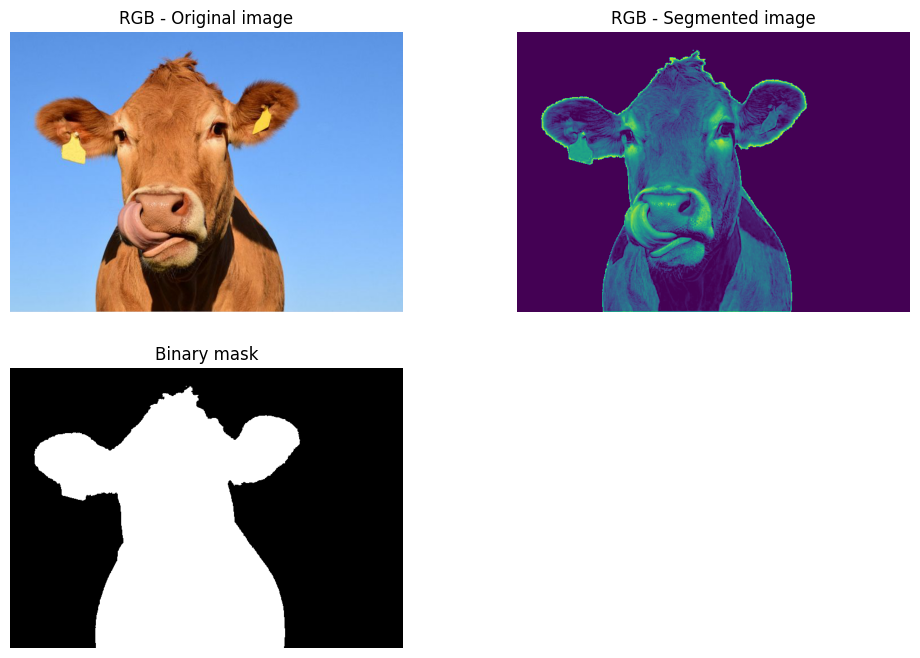

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(im)
plt.title('RGB - Original image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(segmented_image)
plt.title('RGB - Segmented image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(mask, cmap='gray')
plt.title('Binary mask')
plt.axis('off')
plt.show()

In [ ]:
from skimage import io
from skimage import img_as_uint

io.imsave('/content/drive/MyDrive/ELT578_2022_2/SEMANA_3/cowbw.jpg', img_as_uint(mask))

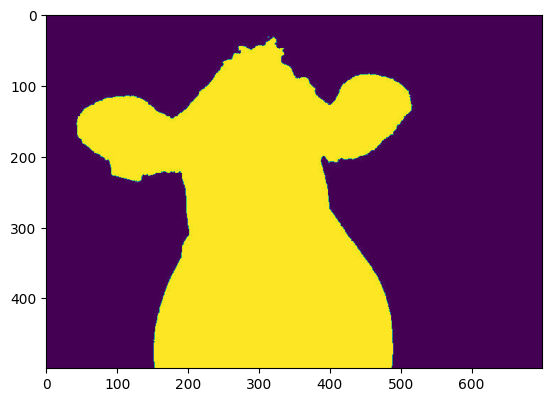

In [ ]:
binaryImage = imread(r'/content/drive/MyDrive/ELT578_2022_2/SEMANA_3/cowbw.jpg')
Segim = plt.imshow(binaryImage)

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from skimage.measure import label, regionprops_table

labels = label(binaryImage)
props = regionprops_table(labels, properties=('centroid','perimeter','area','orientation','eccentricity','solidity', 'major_axis_length', 'minor_axis_length'))
pd.DataFrame(props)

,centroid-0,centroid-1,perimeter,area,orientation,eccentricity,solidity,major_axis_length,minor_axis_length
0,32.0,304.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
1,32.0,307.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
2,32.0,310.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
3,32.0,313.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
4,32.0,314.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
5590,495.0,158.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
5591,497.0,152.0,1.0,3,0.000000,1.0,1.0,3.265986,0.0
5592,497.0,153.0,1.0,3,0.000000,1.0,1.0,3.265986,0.0
5593,497.0,155.0,1.0,3,0.000000,1.0,1.0,3.265986,0.0


In [ ]:
ret,thresh = cv2.threshold(binaryImage,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

area = cv2.contourArea(cnt) #Area

perimeter = cv2.arcLength(cnt,True) #Perimetro

FF = (4*np.pi*area)/(np.power(perimeter,2)) #Fator de Forma

compacidade = (np.power(perimeter,2))/area #Compacidade

rect = cv2.minAreaRect(cnt) #Excentricidade (Retângulo envolvente)
E_maior = max(rect[1])
E_menor = min(rect[1])
Excentricidade = E_maior/E_menor

Retangularidade = area/(E_maior*E_menor) #Retangularidade

Fecho = cv2.convexHull(cnt) #Convexidade (Contorno convexo)
Fecho = np.int0(Fecho)
Convexidade = len(Fecho)/perimeter

area = cv2.contourArea(cnt) #Solidez
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

print(area)
print(perimeter)
print(FF)
print(compacidade)
print(Excentricidade)
print(Retangularidade)
print(Convexidade)
print(solidity)

127416.5
2149.800199866295
0.346449020219499
36.271918466958056
1.0150214592274678
0.5780675806876027
0.010233509142555794
0.7219678726237357


###**4.   Segmentação por Detecção de Bordas**


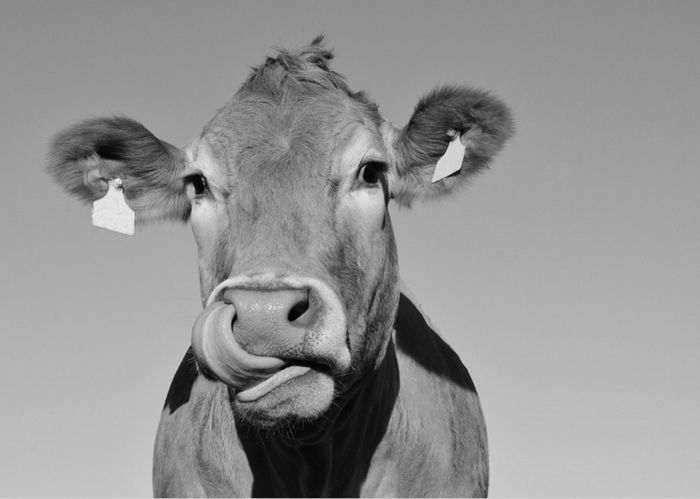

uint8
<built-in method min of numpy.ndarray object at 0x7f88a74a2430>
<built-in method max of numpy.ndarray object at 0x7f88a74a2430>


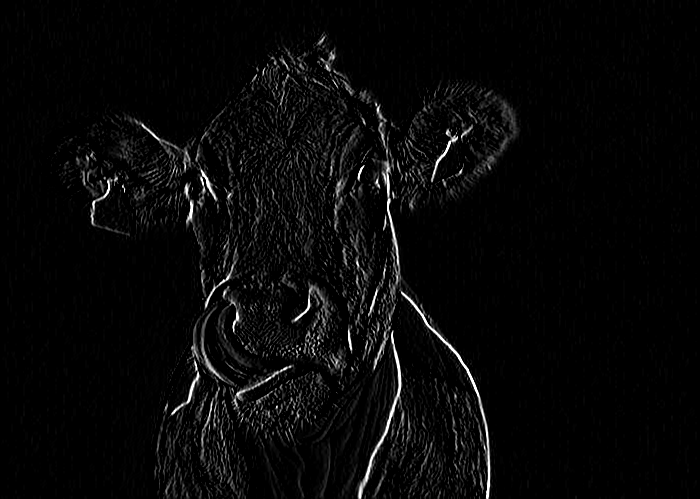

uint8
<built-in method min of numpy.ndarray object at 0x7f88a74a23d0>
<built-in method max of numpy.ndarray object at 0x7f88a74a23d0>


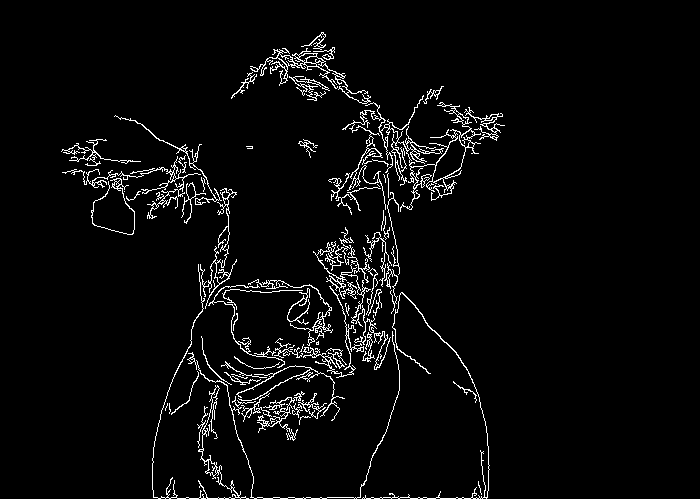

In [16]:
import cv2
im2 = cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_3/cow.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(im2)

#Sobel - https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html
cow_sobel = cv2.Sobel(im2,-1,1,0)
print(cow_sobel.dtype)
print(cow_sobel.min)
print(cow_sobel.max)

#QUAL PROCESSAMENTO É ESSE? 
cow_sobel = (cow_sobel.astype(float)-cow_sobel.min())/(cow_sobel.max()-cow_sobel.min())*255
cow_sobel = np.uint8(cow_sobel)
cv2_imshow(cow_sobel)


#Canny
cow_canny = cv2.Canny(im2,300,50)
print(cow_canny.dtype)
print(cow_canny.min)
print(cow_canny.max)
cow_canny = (cow_canny.astype(float)-cow_canny.min())/(cow_canny.max()-cow_canny.min())*255
cow_canny = np.uint8(cow_canny)
cv2_imshow(cow_canny)
